In [ ]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

# **Project 2: Word Embeddings and the Brain**

## **Open-Ended Task - Multimodal Decoding**



In [ ]:
!unzip IARPA_expt1_stim_images.zip

In [2]:
concept_categories = {
    "People & Roles": [
        "Doctor", "Driver", "Student", "King", "Lady", "Professional", "Liar", "Suspect", "Job"
    ],
    "Cognitive / Emotional States": [
        "Ability", "Accomplished", "Angry", "Attitude", "Emotion", "Emotionally", "Feeling", "Great",
        "Help", "Hurting", "Impress", "Kindness", "Laugh", "Personality", "Sad", "Smart", "Smiling",
        "Stupid", "Successful", "Typical", "Unaware", "Willingly", "Ignorance",
        "Charming", "Crazy", "Silly", "Pleasure", "Poor"
    ],
    "Relationships / Social Concepts": [
        "Argument", "Argumentatively", "Charity", "Marriage", "Relationship", "Religious", "Sin",
        "Protection", "Obligation", "Law", "Team"
    ],
    "Objects & Things": [
        "Bag", "Ball", "Bar", "Bed", "Beer", "Camera", "Clothes", "Cockroach", "Computer", "Device",
        "Gold", "Gun", "Hair", "Light", "Medication", "Money", "Picture", "Pig", "Plant", "Ship",
        "Sign", "Skin", "Star", "Sugar", "Table", "Tool", "Toy", "Tree",
        "Bear", "Bird", "Dog", "Engine"
    ],
    "Places & Structures": [
        "Apartment", "Building", "Construction", "Jungle", "Land", "Mountain", "Nation", "Residence", "Road",
        "Prison", "Vacation"
    ],
    "Food & Drink": [
        "Beer", "Dessert", "Dinner", "Fish", "Food", "Garbage", "Seafood", "Sugar", "Taste"
    ],
    "Art, Media, Entertainment": [
        "Art", "Dance", "Movie", "Music", "Show",
        "Applause", "News", "Noise"
    ],
    "Processes / Actions": [
        "Beat", "Burn", "Challenge", "Cook", "Counting", "Damage", "Deceive", "Dedication",
        "Deliberately", "Delivery", "Dig", "Dissolve", "Disturb", "Do", "Movement", "Plan", "Play",
        "Reaction", "Read", "Sell", "Sew", "Spoke", "Trial", "Tried", "Wash", "Wear",
        "Carefully", "Dressing", "Fight", "Flow", "Left"
    ],
    "Abstract / Conceptual": [
        "Big","Business", "Code", "Collection", "Economy", "Election", "Electron", "Elegance", "Event",
        "Experiment", "Invention", "Investigation", "Invisible", "Level", "Magic", "Material",
        "Mathematical", "Mechanism", "Philosophy", "Quality", "Science", "Shape", "Solution",
        "Soul", "Sound", "Texture", "Time", "Usable", "Useless", "Word",
        "Extremely", "Sexy"
    ],
    "Risk, Danger, & Health": [
        "Blood", "Body", "Broken", "Dangerous", "Disease", "Illness", "Pain", "War", "Weak",
        "Brain", "Weather"
    ]
}

# **Experiments**

In [ ]:
!pip install git+https://github.com/openai/CLIP.git
!pip install transformers
!pip install pillow-avif-plugin
!pip install open_clip_torch
!pip install -U llama-index-embeddings-huggingface

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [ ]:
class UnifiedEncoder:
    def __init__(self, encoder_type, include_text=False):
        self.encoder_type = encoder_type
        self.include_text = include_text
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        if encoder_type == "clip":
            import clip
            self.model, self.preprocess = clip.load("ViT-B/32", device=self.device)
            self.model.to(self.device)

        elif encoder_type == "openclip":
            import open_clip
            self.model, _, self.preprocess = open_clip.create_model_and_transforms(
                "ViT-H-14", pretrained="laion2b_s32b_b79k"
            )
            self.model.to(self.device)

        elif encoder_type == "siglip":
            from transformers import AutoProcessor, AutoModel
            self.processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-224")
            self.model = AutoModel.from_pretrained("google/siglip-base-patch16-224").to(self.device)

        elif encoder_type == "vdr":
            self.model = HuggingFaceEmbedding(
                model_name="llamaindex/vdr-2b-multi-v1",
                device=self.device,
                trust_remote_code=True
            )

        elif encoder_type == "blip2":
            from transformers import Blip2Processor, Blip2Model
            self.processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
            self.model = Blip2Model.from_pretrained("Salesforce/blip2-opt-2.7b").to(self.device)

        elif encoder_type == "resnet":
            import torchvision.models as models
            import torchvision.transforms as transforms
            self.model = models.resnet50(pretrained=True).to(self.device)
            self.model.eval()
            self.preprocess = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])

        elif encoder_type == "dinov2":
            from transformers import AutoImageProcessor, AutoModel
            self.processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")
            self.model = AutoModel.from_pretrained("facebook/dinov2-base").to(self.device)

        else:
            raise ValueError(f"Unknown encoder type: {encoder_type}")

    def encode_image(self, image_path):
        image = Image.open(image_path).convert("RGB")
        if self.encoder_type in ["clip", "openclip"]:
            image_tensor = self.preprocess(image).unsqueeze(0).to(self.device)
            with torch.no_grad():
                emb = self.model.encode_image(image_tensor)
                emb = emb / emb.norm(dim=-1, keepdim=True)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "siglip":
            inputs = self.processor(images=image, return_tensors="pt").to(self.device)
            with torch.no_grad():
                emb = self.model.get_image_features(**inputs)
                emb = emb / emb.norm(dim=-1, keepdim=True)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "vdr":
            return np.array(self.model.get_image_embedding(image)).squeeze()

        elif self.encoder_type == "blip2":
            inputs = self.processor(images=image, return_tensors="pt").to(self.device)
            with torch.no_grad():
                emb = self.model.vision_model(**inputs).last_hidden_state.mean(dim=1)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "resnet":
            image_tensor = self.preprocess(image).unsqueeze(0).to(self.device)
            with torch.no_grad():
                emb = self.model(image_tensor)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "dinov2":
            inputs = self.processor(images=image, return_tensors="pt").to(self.device)
            with torch.no_grad():
                emb = self.model(**inputs).last_hidden_state.mean(dim=1)
            return emb.cpu().numpy().squeeze()

    def encode_text(self, text):
        if not self.include_text:
            raise RuntimeError(f"Text encoding is disabled for encoder: {self.encoder_type}")

        with torch.no_grad():
            if self.encoder_type == "clip":
                import clip
                tokens = clip.tokenize([text]).to(self.device)
                emb = self.model.encode_text(tokens)

            elif self.encoder_type == "openclip":
                import open_clip
                tokenizer = open_clip.get_tokenizer("ViT-H-14")
                tokens = tokenizer([text]).to(self.device)
                emb = self.model.encode_text(tokens)

            elif self.encoder_type == "siglip":
                inputs = self.processor(text=[text], return_tensors="pt").to(self.device)
                emb = self.model.get_text_features(**inputs)

            elif self.encoder_type == "vdr":
                return np.array(self.model.get_query_embedding(text)).squeeze()

            else:
                raise ValueError(f"Text encoding not supported for encoder: {self.encoder_type}")

            emb = emb / emb.norm(dim=-1, keepdim=True)
            return emb.cpu().numpy().squeeze()


# ===============================
# DATA LOADING AND UTILITIES
# ===============================
def load_concepts(file):
    with open(file, "r") as f:
        return [line.strip() for line in f if line.strip()]

def load_embeddings(concepts, encoder, image_root="images"):
    img_embs, txt_embs = {}, {}
    for concept in tqdm(concepts, desc=f"Encoding with {encoder.encoder_type}"):
        folder = os.path.join(image_root, concept)
        if not os.path.isdir(folder): continue
        image_vecs = []
        for fname in sorted(os.listdir(folder)):
            if fname.lower().endswith((".jpg", ".jpeg", ".png", ".avif")):
                try:
                    image_vecs.append(encoder.encode_image(os.path.join(folder, fname)))
                except:
                    continue
        if image_vecs:
            img_embs[concept] = np.mean(image_vecs, axis=0)
            if encoder.include_text:
                txt_embs[concept] = encoder.encode_text(concept)
    return img_embs, txt_embs if encoder.include_text else None

# ===============================
# EVALUATION
# ===============================
def compute_metrics(data, vectors, concepts, decoder_func, k=18, fold_size=10):
    all_ranks, top5s, mrrs = [], [], []
    for i in range(k):
        test_idx = np.arange(i * fold_size, (i + 1) * fold_size)
        train_idx = np.setdiff1d(np.arange(len(concepts)), test_idx)
        decoder = decoder_func(data[train_idx], vectors[train_idx])
        predicted = data[test_idx] @ decoder
        for j, idx in enumerate(test_idx):
            sim = cosine_similarity(predicted[j].reshape(1, -1), vectors).flatten()
            rank = np.argsort(-sim).tolist().index(idx) + 1
            all_ranks.append(rank)
            top5s.append(rank <= 5)
            mrrs.append(1.0 / rank)
    return np.mean(all_ranks), np.mean(top5s) * 100, np.mean(mrrs), all_ranks


# ===============================
# MAIN PIPELINE
# ===============================
if __name__ == "__main__":
    from learn_decoder import read_matrix, learn_decoder

    concepts = load_concepts("images/images_concepts.txt")
    brain_data = read_matrix("imaging_data.csv", sep=",")

    image_only_models = ["blip2", "resnet", "dinov2"]
    multimodal_models = ["clip", "openclip", "siglip", "vdr"]

    image_results, all_ranks_img = {}, {}
    multimodal_results, all_ranks_mm = {}, {}

    # Image-only models
    for model in image_only_models:
        encoder = UnifiedEncoder(model, include_text=False)
        img_embs, _ = load_embeddings(concepts, encoder)
        vectors = np.stack([img_embs[c] for c in concepts])
        avg_rank, top5, mrr, all_ranks = compute_metrics(brain_data, vectors, concepts, learn_decoder)
        image_results[model] = (avg_rank, top5, mrr)
        all_ranks_img[model] = all_ranks

    # Multimodal models
    for model in multimodal_models:
        encoder = UnifiedEncoder(model, include_text=True)
        img_embs, txt_embs = load_embeddings(concepts, encoder)
        image_vecs = np.stack([img_embs[c] for c in concepts])
        text_vecs = np.stack([txt_embs[c] for c in concepts])
        combo_vecs = 0.5 * image_vecs + 0.5 * text_vecs if image_vecs.shape[1] == text_vecs.shape[1] else None

        result = {}
        for name, vecs in zip(["image", "text", "combo"], [image_vecs, text_vecs, combo_vecs]):
            if vecs is None: continue
            avg_rank, top5, mrr, all_ranks = compute_metrics(brain_data, vecs, concepts, learn_decoder)
            result.setdefault("Average Rank", {})[name] = avg_rank
            result.setdefault("Top-5 Accuracy", {})[name] = top5
            result.setdefault("MRR", {})[name] = mrr
            all_ranks_mm[f"{model}_{name}"] = all_ranks
        multimodal_results[model] = result



In [ ]:
# load data to pkl
import pickle

with open("evaluation_results.pkl", "wb") as f:
    pickle.dump({
        "image_results": image_results,
        "multimodal_results": multimodal_results,
        "all_ranks_img": all_ranks_img,
        "all_ranks_mm": all_ranks_mm
    }, f)
print("✅ Evaluation results saved successfully")

# **Analyses**

## **Image-only Decoding Across All Models and Category Analysis with Image Embeddings**

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open("evaluation_results (1).pkl", "rb") as f:
  data = pickle.load(f)

image_results = data["image_results"]
multimodal_results = data["multimodal_results"]
all_ranks_img = data["all_ranks_img"]
all_ranks_mm = data["all_ranks_mm"]

print("✅ Evaluation results loaded successfully")

✅ Evaluation results loaded successfully


In [4]:
def load_concepts(file):
    with open(file, "r") as f:
        return [line.strip() for line in f if line.strip()]

concepts = load_concepts("images_concepts.txt")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Build COMBINED IMAGE METRICS DATAFRAME
# ============================

# Start with existing image-only results
df_img_all = pd.DataFrame(image_results).T
df_img_all.columns = ["Average Rank", "Top-5 Accuracy", "MRR"]

# Add the multimodal models' 'image' metrics
for model_name, metrics_dict in multimodal_results.items():
    image_metrics = [
        metrics_dict["Average Rank"].get("image", np.nan),
        metrics_dict["Top-5 Accuracy"].get("image", np.nan),
        metrics_dict["MRR"].get("image", np.nan)
    ]
    df_img_all.loc[model_name] = image_metrics

df_img_all = df_img_all.sort_index()

# Show
print("\n✅ Combined Image-Only Metrics for All Models:")
print(df_img_all.round(2))



✅ Combined Image-Only Metrics for All Models:
          Average Rank  Top-5 Accuracy   MRR
blip2            78.99            4.44  0.04
clip             76.26            2.22  0.04
dinov2           75.22            3.33  0.04
openclip         74.21            2.78  0.04
resnet           76.94            4.44  0.04
siglip           73.89            2.78  0.03
vdr              74.72            2.22  0.03


In [6]:
glove_ranks = [('ability', 8), ('accomplished', 69), ('angry', 22), ('apartment', 66), ('applause', 175), ('argument', 68), ('argumentatively', 180), ('art', 17), ('attitude', 17), ('bag', 45), ('ball', 94), ('bar', 79), ('bear', 49), ('beat', 63), ('bed', 135), ('beer', 62), ('big', 8), ('bird', 58), ('blood', 46), ('body', 29), ('brain', 43), ('broken', 31), ('building', 10), ('burn', 102), ('business', 24), ('camera', 126), ('carefully', 32), ('challenge', 37), ('charity', 128), ('charming', 71), ('clothes', 99), ('cockroach', 178), ('code', 61), ('collection', 77), ('computer', 72), ('construction', 10), ('cook', 67), ('counting', 118), ('crazy', 9), ('damage', 15), ('dance', 64), ('dangerous', 44), ('deceive', 171), ('dedication', 101), ('deliberately', 97), ('delivery', 89), ('dessert', 120), ('device', 70), ('dig', 45), ('dinner', 12), ('disease', 80), ('dissolve', 164), ('disturb', 134), ('do', 1), ('doctor', 77), ('dog', 19), ('dressing', 74), ('driver', 126), ('economy', 34), ('election', 36), ('electron', 168), ('elegance', 158), ('emotion', 60), ('emotionally', 145), ('engine', 105), ('event', 16), ('experiment', 53), ('extremely', 11), ('feeling', 10), ('fight', 44), ('fish', 15), ('flow', 65), ('food', 1), ('garbage', 113), ('gold', 64), ('great', 2), ('gun', 99), ('hair', 7), ('help', 13), ('hurting', 88), ('ignorance', 146), ('illness', 128), ('impress', 48), ('invention', 126), ('investigation', 51), ('invisible', 140), ('job', 59), ('jungle', 114), ('kindness', 145), ('king', 94), ('lady', 6), ('land', 48), ('laugh', 4), ('law', 37), ('left', 6), ('level', 35), ('liar', 115), ('light', 13), ('magic', 42), ('marriage', 85), ('material', 44), ('mathematical', 150), ('mechanism', 87), ('medication', 76), ('money', 7), ('mountain', 17), ('movement', 35), ('movie', 159), ('music', 9), ('nation', 72), ('news', 52), ('noise', 118), ('obligation', 135), ('pain', 22), ('personality', 44), ('philosophy', 47), ('picture', 9), ('pig', 53), ('plan', 25), ('plant', 60), ('play', 8), ('pleasure', 31), ('poor', 21), ('prison', 117), ('professional', 44), ('protection', 44), ('quality', 16), ('reaction', 66), ('read', 14), ('relationship', 8), ('religious', 83), ('residence', 141), ('road', 18), ('sad', 42), ('science', 25), ('seafood', 87), ('sell', 40), ('sew', 157), ('sexy', 53), ('shape', 14), ('ship', 58), ('show', 14), ('sign', 29), ('silly', 12), ('sin', 152), ('skin', 15), ('smart', 53), ('smiling', 35), ('solution', 35), ('soul', 14), ('sound', 37), ('spoke', 59), ('star', 33), ('student', 28), ('stupid', 5), ('successful', 15), ('sugar', 51), ('suspect', 67), ('table', 52), ('taste', 21), ('team', 15), ('texture', 54), ('time', 1), ('tool', 38), ('toy', 83), ('tree', 31), ('trial', 98), ('tried', 21), ('typical', 36), ('unaware', 20), ('usable', 158), ('useless', 36), ('vacation', 150), ('war', 25), ('wash', 119), ('weak', 96), ('wear', 13), ('weather', 126), ('willingly', 139), ('word', 13)]
w2v_ranks = [('ability', 69), ('accomplished', 151), ('angry', 15), ('apartment', 23), ('applause', 114), ('argument', 97), ('argumentatively', 177), ('art', 14), ('attitude', 15), ('bag', 24), ('ball', 78), ('bar', 103), ('bear', 105), ('beat', 130), ('bed', 136), ('beer', 32), ('big', 15), ('bird', 12), ('blood', 77), ('body', 108), ('brain', 17), ('broken', 107), ('building', 17), ('burn', 119), ('business', 82), ('camera', 132), ('carefully', 59), ('challenge', 105), ('charity', 143), ('charming', 34), ('clothes', 61), ('cockroach', 23), ('code', 75), ('collection', 113), ('computer', 41), ('construction', 105), ('cook', 19), ('counting', 93), ('crazy', 7), ('damage', 40), ('dance', 88), ('dangerous', 34), ('deceive', 50), ('dedication', 40), ('deliberately', 68), ('delivery', 76), ('dessert', 14), ('device', 13), ('dig', 4), ('dinner', 23), ('disease', 61), ('dissolve', 103), ('disturb', 74), ('do', 6), ('doctor', 44), ('dog', 15), ('dressing', 9), ('driver', 133), ('economy', 41), ('election', 48), ('electron', 61), ('elegance', 84), ('emotion', 2), ('emotionally', 80), ('engine', 89), ('event', 58), ('experiment', 29), ('extremely', 120), ('feeling', 16), ('fight', 89), ('fish', 12), ('flow', 141), ('food', 5), ('garbage', 78), ('gold', 123), ('great', 53), ('gun', 38), ('hair', 3), ('help', 128), ('hurting', 20), ('ignorance', 74), ('illness', 67), ('impress', 42), ('invention', 81), ('investigation', 39), ('invisible', 65), ('job', 99), ('jungle', 118), ('kindness', 32), ('king', 46), ('lady', 15), ('land', 89), ('laugh', 1), ('law', 38), ('left', 78), ('level', 150), ('liar', 5), ('light', 51), ('magic', 14), ('marriage', 59), ('material', 66), ('mathematical', 41), ('mechanism', 109), ('medication', 29), ('money', 44), ('mountain', 34), ('movement', 55), ('movie', 153), ('music', 11), ('nation', 79), ('news', 111), ('noise', 96), ('obligation', 88), ('pain', 26), ('personality', 13), ('philosophy', 27), ('picture', 58), ('pig', 27), ('plan', 76), ('plant', 99), ('play', 26), ('pleasure', 71), ('poor', 47), ('prison', 66), ('professional', 112), ('protection', 83), ('quality', 88), ('reaction', 18), ('read', 66), ('relationship', 58), ('religious', 62), ('residence', 119), ('road', 73), ('sad', 43), ('science', 107), ('seafood', 4), ('sell', 71), ('sew', 15), ('sexy', 8), ('shape', 34), ('ship', 48), ('show', 52), ('sign', 51), ('silly', 4), ('sin', 45), ('skin', 12), ('smart', 22), ('smiling', 6), ('solution', 134), ('soul', 2), ('sound', 77), ('spoke', 66), ('star', 141), ('student', 66), ('stupid', 1), ('successful', 92), ('sugar', 57), ('suspect', 81), ('table', 115), ('taste', 25), ('team', 43), ('texture', 35), ('time', 81), ('tool', 106), ('toy', 99), ('tree', 32), ('trial', 60), ('tried', 135), ('typical', 68), ('unaware', 39), ('usable', 52), ('useless', 7), ('vacation', 122), ('war', 82), ('wash', 78), ('weak', 95), ('wear', 9), ('weather', 43), ('willingly', 30), ('word', 45)]

glove_rank_list = [t[1] for t in glove_ranks]
w2v_rank_list = [t[1] for t in w2v_ranks]

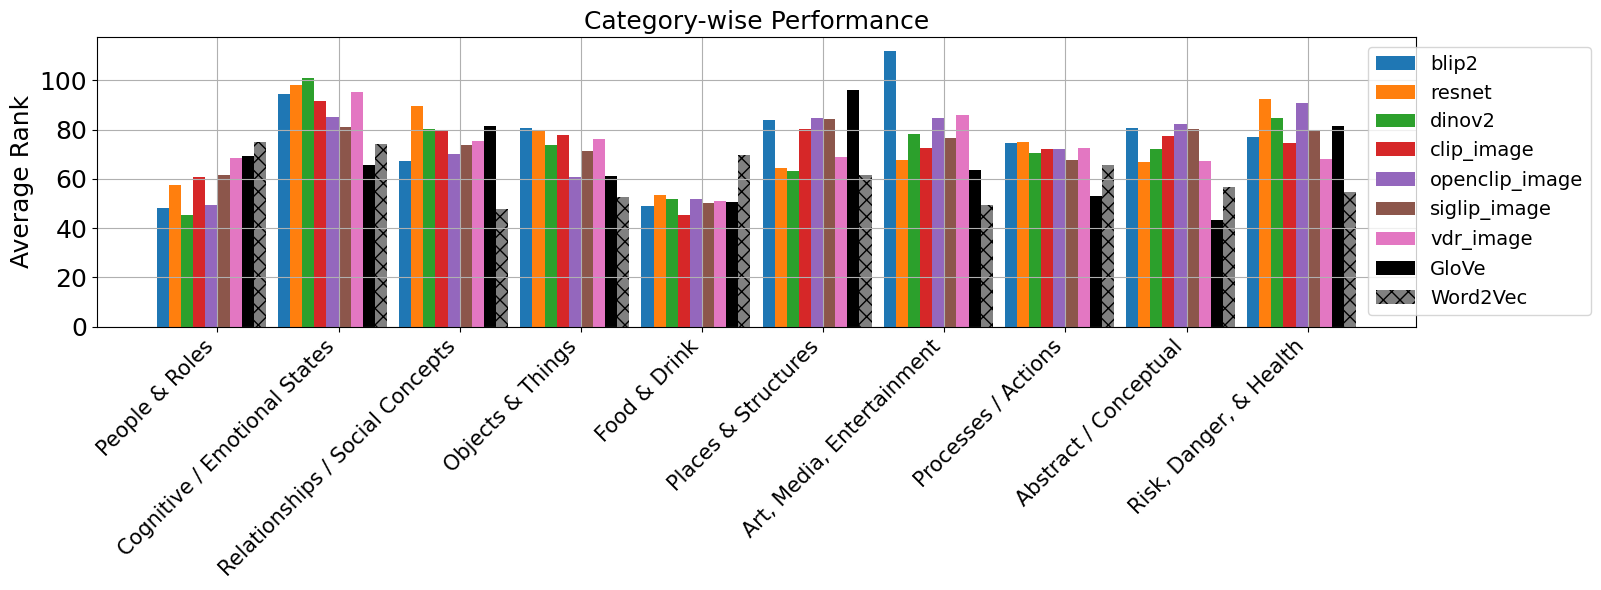

In [7]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# ============================
# COMBINE ALL IMAGE EMBEDDINGS
# ============================
all_ranks_img_full = dict(all_ranks_img)  # image-only models
for k, v in all_ranks_mm.items():
    if k.endswith("_image"):
        all_ranks_img_full[k] = v

# Add GloVe and Word2Vec manually for comparison
all_ranks_img_full["GloVe"] = [rank for _, rank in glove_ranks]
all_ranks_img_full["Word2Vec"] = [rank for _, rank in w2v_ranks]

# ============================
# CATEGORY BAR PLOTS
# ============================
category_scores_img = defaultdict(dict)
concept_to_category = {c: cat for cat, clist in concept_categories.items() for c in clist}
concepts_sorted = list(concept_to_category.keys())

# Aggregate category scores per model
for model, ranks in all_ranks_img_full.items():
    cat_ranks = defaultdict(list)
    for i, rank in enumerate(ranks):
        concept = concepts_sorted[i % len(concepts_sorted)]
        cat = concept_to_category.get(concept, "Other")
        cat_ranks[cat].append(rank)
    for cat, vals in cat_ranks.items():
        category_scores_img[cat][model] = np.mean(vals)

# Plotting
categories = list(category_scores_img.keys())
x = np.arange(len(categories))
width = 0.1

plt.figure(figsize=(16, 6))

# Color and hatch settings
colors = plt.cm.tab10.colors
special_colors = {
    "GloVe": "black",
    "Word2Vec": "gray"
}
hatch_patterns = {
    "GloVe": "//",
    "Word2Vec": "xx"
}

for i, model in enumerate(all_ranks_img_full.keys()):
    heights = [category_scores_img[cat].get(model, np.nan) for cat in categories]
    color = special_colors.get(model, colors[i % len(colors)])
    hatch = hatch_patterns.get(model, None)
    plt.bar(x + i * width, heights, width, label=model, color=color, hatch=hatch)

plt.xticks(x + width * len(all_ranks_img_full) / 2, categories, rotation=45, ha="right", fontsize=15)
plt.ylabel("Average Rank", fontsize=18)
plt.yticks(fontsize=18)
plt.title("Category-wise Performance", fontsize=18)
plt.legend(bbox_to_anchor=(1.14, 1), loc='upper right', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Multimodal Integration: Image and Text and Category-Level Analysis Across Modalities**

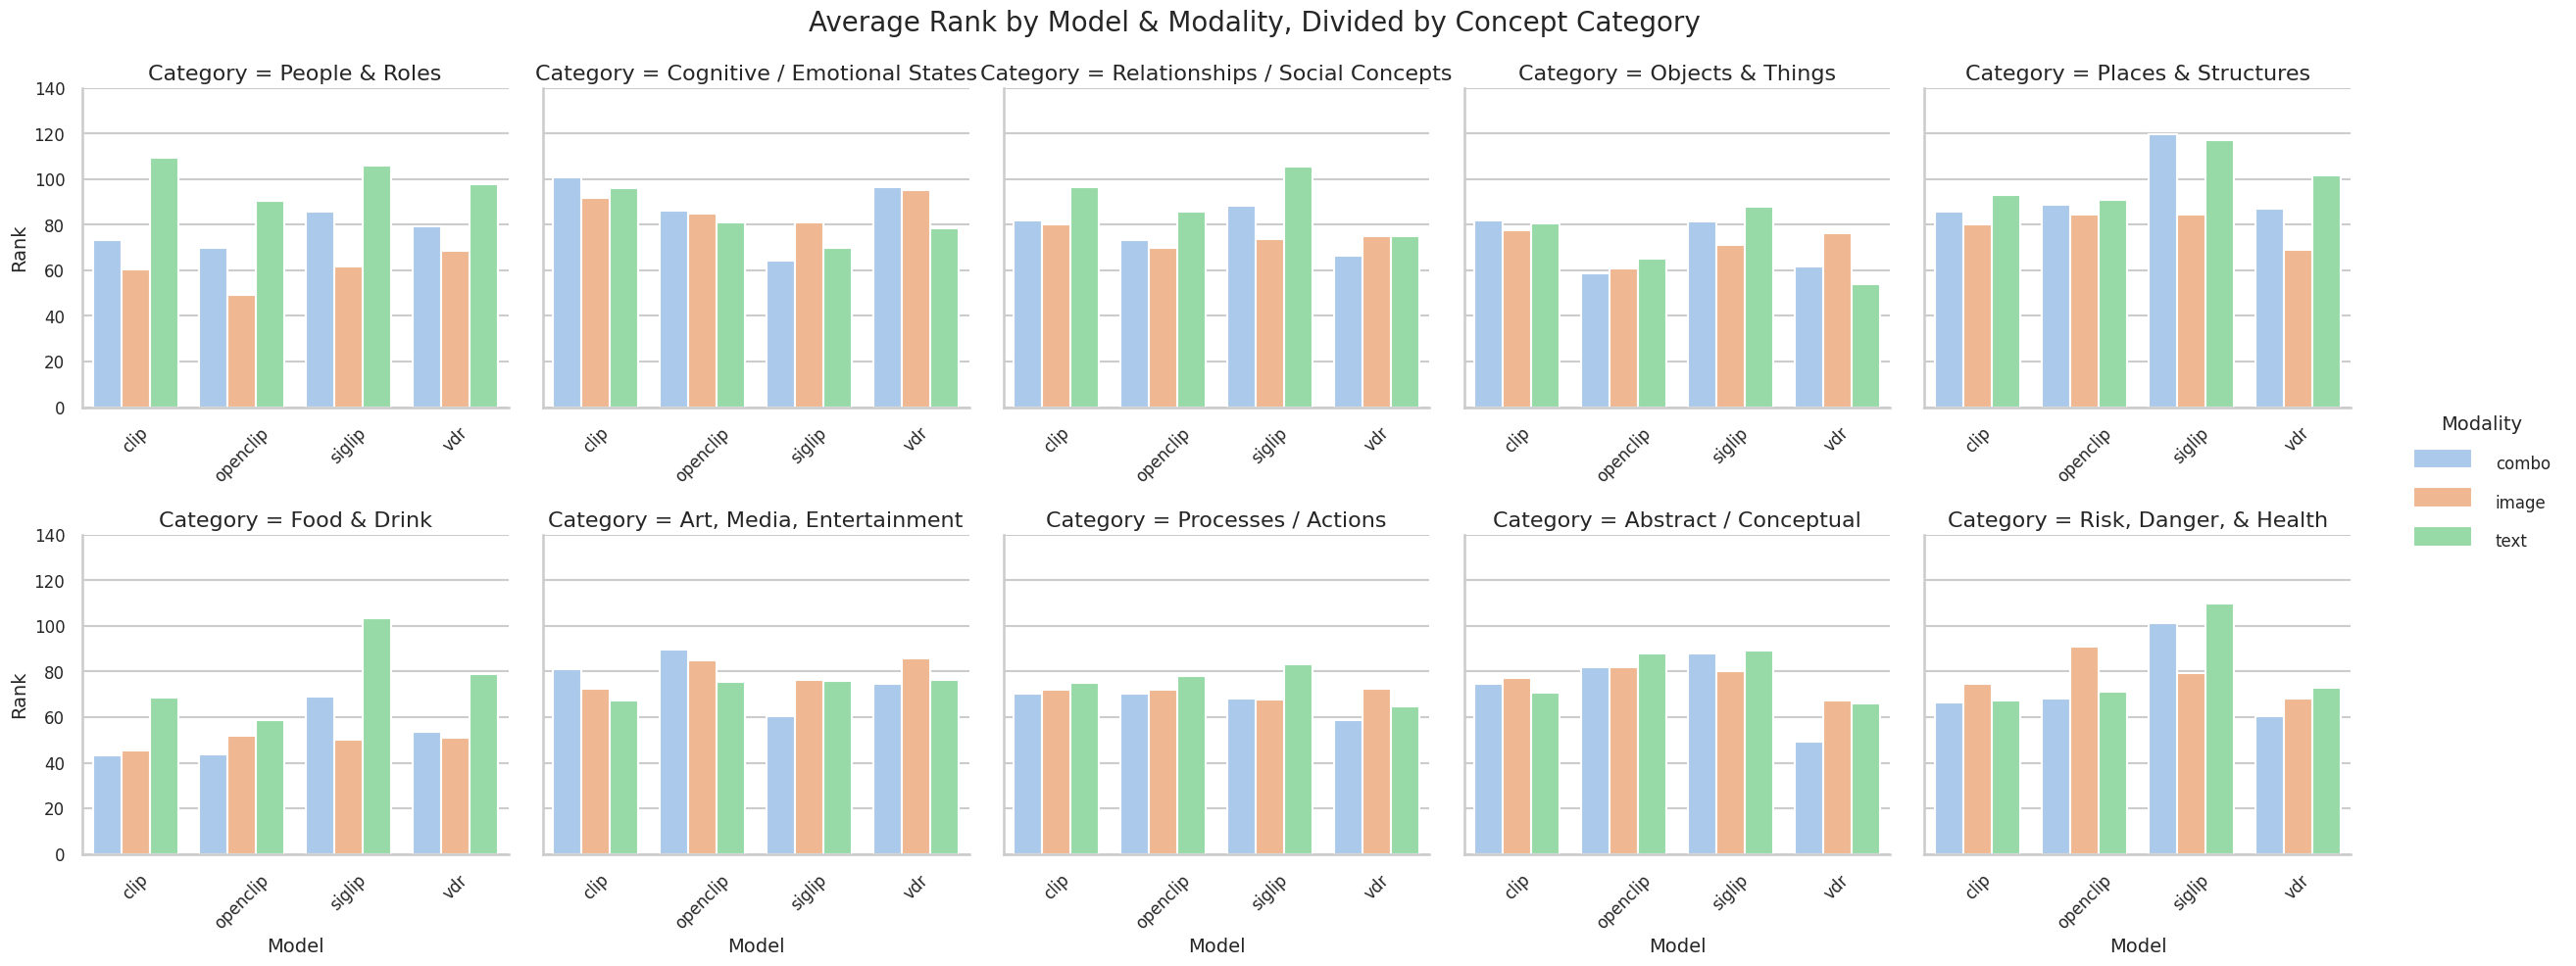

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk", font_scale=1.3)
sns.set_style("whitegrid")

# build DataFrame for seaborn
rows = []
for model_mod, ranks in all_ranks_mm.items():
    model, modality = model_mod.split("_",1)
    for i, rank in enumerate(ranks):
        concept = concepts_sorted[i % len(concepts_sorted)]
        category = concept_to_category.get(concept, "Other")
        rows.append({
            "Category": category,
            "Model": model,
            "Modality": modality,
            "Rank": rank
        })
df_long = pd.DataFrame(rows)

# compute average ranks
df_summary = df_long.groupby(["Category","Model","Modality"])["Rank"].mean().reset_index()

# enforce category order
cat_order = list(concept_categories.keys())
df_summary["Category"] = pd.Categorical(df_summary["Category"], categories=cat_order, ordered=True)

palette = sns.color_palette("pastel", 3)
# plot with fixed y-axis, 5x2 grid
g = sns.catplot(
    data=df_summary, kind="bar",
    x="Model", y="Rank", hue="Modality",
    col="Category", col_wrap=5,
    height=5, aspect=1,
    palette=palette,
    legend_out=True,
    sharey=True
)
g.set(ylim=(0,140))

for ax in g.axes.flatten():
    ax.tick_params(axis='x', which='both', labelrotation=45, labelbottom=True, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.title.set_size(16)

g._legend.set_title("Modality", prop={"size":14})
for text in g._legend.get_texts():
    text.set_fontsize(12)

g.fig.subplots_adjust(hspace=0.4, top=0.9)
g.fig.suptitle("Average Rank by Model & Modality, Divided by Concept Category", fontsize=20)

plt.show()


In [ ]:
def bootstrap_ci(data, n_boot=1000, ci=95):
    means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_boot)]
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100-(100-ci)/2)
    return lower, upper

rows = []
for model, metrics in multimodal_results.items():
    for modality in ['image','text','combo']:
        if modality in metrics["Average Rank"]:
            # build key to fetch ranks
            model_key = f"{model}_{modality}"
            ci_string = "-"
            if model_key in all_ranks_mm:
                ranks = np.array(all_ranks_mm[model_key])
                ci_lower, ci_upper = bootstrap_ci(ranks)
                ci_string = f"[{ci_lower:.2f}, {ci_upper:.2f}]"

            rows.append({
                "Model": model,
                "Modality": modality,
                "Average Rank": metrics["Average Rank"].get(modality, np.nan),
                "Top-5 Accuracy": metrics["Top-5 Accuracy"].get(modality, np.nan),
                "MRR": metrics["MRR"].get(modality, np.nan),
                "Mean Rank CI": ci_string
            })

df_multi_ci = pd.DataFrame(rows).set_index(["Model","Modality"])
df_multi_ci = df_multi_ci.round(2)

print("\n✅ Multi-dimension metrics table with CI:")
print(df_multi_ci)



✅ Multi-dimension metrics table with CI:
                   Average Rank  Top-5 Accuracy   MRR    Mean Rank CI
Model    Modality                                                    
clip     image            76.26            2.22  0.04  [69.63, 83.65]
         text             81.53            4.44  0.04  [73.45, 89.13]
         combo            78.42            2.22  0.03  [70.84, 85.59]
openclip image            74.21            2.78  0.04  [66.95, 80.88]
         text             78.55            3.33  0.04  [71.58, 85.53]
         combo            73.59            6.67  0.05  [66.82, 80.33]
siglip   image            73.89            2.78  0.03  [66.48, 80.51]
         text             89.84            3.33  0.03  [82.23, 97.99]
         combo            80.28            6.11  0.04  [72.28, 87.68]
vdr      image            74.72            2.22  0.03  [68.46, 81.61]
         text             71.46            3.89  0.04  [64.57, 78.26]
         combo            67.19            3.89 

## **Correlation with Visual Features**

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# extract visual features
def compute_image_features(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_brightness = img_gray.mean()
    edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)
    edge_density = edges.mean() / 255
    return mean_brightness, edge_density

records = []
for concept in concepts:
    concept_dir = os.path.join("images", concept)
    if not os.path.isdir(concept_dir):
        continue
    brightness_list = []
    edge_density_list = []
    for fname in os.listdir(concept_dir):
        if fname.lower().endswith((".jpg", ".jpeg", ".png", ".avif")):
            fpath = os.path.join(concept_dir, fname)
            try:
                mean_b, edge_d = compute_image_features(fpath)
                brightness_list.append(mean_b)
                edge_density_list.append(edge_d)
            except:
                continue
    if brightness_list:
        records.append({
            "Concept": concept,
            "MeanBrightness": np.mean(brightness_list),
            "EdgeDensity": np.mean(edge_density_list)
        })

visual_features = pd.DataFrame(records)

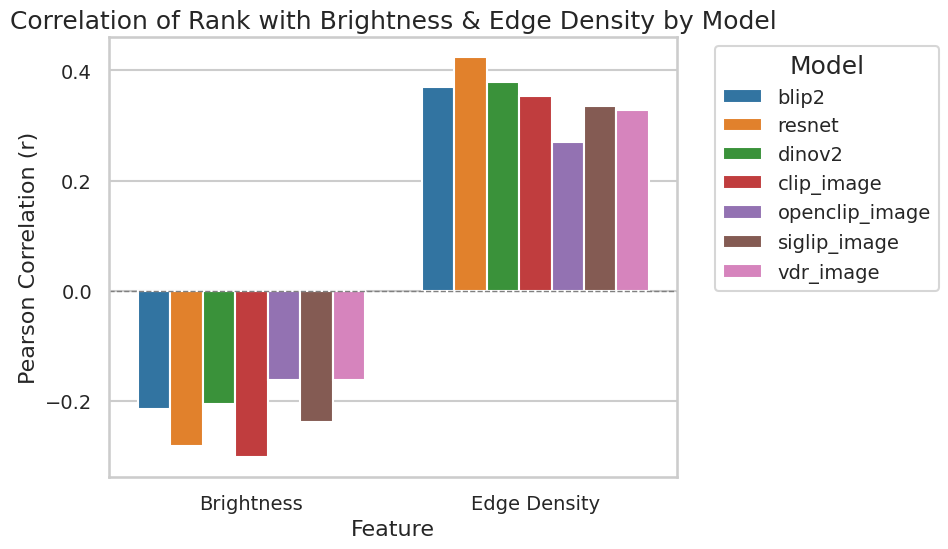

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# COMBINE ALL RANKS
all_ranks_full = dict(all_ranks_img_full)
for k,v in all_ranks_mm.items():
    all_ranks_full[k] = v
# ------------------------
# BUILD THE SUMMARY TABLE
# ------------------------
records = []
for model_name, ranks_list in all_ranks_full.items():
    if model_name.endswith("_combo") or model_name.endswith("_text"):
      continue
    ranks = np.array(ranks_list[:len(visual_features)])
    df = visual_features.copy()
    df["Rank"] = ranks

    corr_b = np.corrcoef(df["MeanBrightness"], df["Rank"])[0,1]
    corr_e = np.corrcoef(df["EdgeDensity"], df["Rank"])[0,1]

    records.append({"Model": model_name, "Feature": "Brightness", "Correlation": corr_b})
    records.append({"Model": model_name, "Feature": "Edge Density", "Correlation": corr_e})

df_corr = pd.DataFrame(records)

# ------------------------
# MAKE THE GROUPED BAR PLOT
# ------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=df_corr, x="Feature", y="Correlation", hue="Model")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Correlation of Rank with Brightness & Edge Density by Model", fontsize=18)
plt.ylabel("Pearson Correlation (r)", fontsize=16)
plt.xlabel("Feature", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=18)
plt.tight_layout()
plt.show()
